In [ ]:
# Don B.
# Dr. Ofori
# Topic 6 DQ 1
# 21 October 2023
# YouTube Link: https://youtu.be/P6yNMvpT8FY

In [ ]:
'''
Hypothesis testing for paired data?

Paired (Dependent Samples): 
The null hypothesis (could be): that the population means are equal.
or Shift in Distribution or Correlation

Paired data pertains to datasets wherein each observation from one sample corresponds directly 
to a specific observation in another sample, often due to inherent relationships or experimental design.

Often, this occurs in "before-and-after" scenarios or when the same individuals are 
measured under two different conditions.

Common Test: Paired sample t-test, Wilcoxon Matched Pairs (or Wilcoxon Signed-Rank Test)

Assumptions:
# Pairing: Observations in the datasets are inherently paired, usually from "before-and-after" measurements 
or repeated measurements on the same subjects.
# Interval or Ratio Scale: The outcome being measured is continuous
# Normality of Differences: The differences between the paired observations are approximately normally distributed.
# Independence: The differences between paired observations are independent of each other.
# Random Sampling: Data pairs represent a random sample from the population, ensuring results can be generalized.
# Absence of Outliers: There should not be significant outliers in the differences between paired observations.

Consequences:
Violating the normality assumption may increase the chance of Type I errors.
Independence violation can bias results, making tests too liberal.

Solutions/ Remedies:
If normality is violated, consider non-parametric tests like the Wilcoxon Signed-Rank Test.
Ensure research design maintains independence between data pairs.

Example: Measuring students' scores before and after attending a special training. 
Each student has two scores: one before and one after. (pre-treatment & post treatment)
Example: Comparing patients' blood pressure before and after administering a new medication.
Why: Since each patient provides two measurements, the data is paired.
'''

'''
Hypothesis testing for multiple population means, 

Null Hypothesis (H₀):
All population means are equal (e.g., μ₁ = μ₂ = μ₃ ... = μk, where k is the number of groups).
Alternative Hypothesis (Hₐ or H₁):
For a two-sided test: At least one population mean is different from the others. 
(This does not specify which mean(s) is/are different).

This approach involves comparing the means of two or more independent samples to infer if there's 
statistical evidence that the associated population means are significantly different.
Often, this type of comparison is done when investigating results from different conditions or groups that 
aren't related.

Common Tests: One-way Analysis of Variance (ANOVA), Kruskal-Wallis H Test (non-parametric counterpart to ANOVA), 
Two-sample t-test (for two means comparison), Welch's t-test (for unequal variances)

Assumptions:
#Independence of Observations: Each sample or group is independent from the others, 
meaning observations within each group are not influenced by any other group.
#Interval or Ratio Scale: The dependent variable should be measured on an interval or ratio scale.
#Homogeneity of Variances: Variances among each group should be roughly similar, 
which can be tested using Levene's Test.
#Normality: The distribution of the residuals (errors) should follow a normal distribution, 
testable through methods like the Shapiro-Wilk test. 
However, ANOVA is somewhat robust against this assumption if sample sizes across groups are similar.
#Random Sampling: The groups represent random samples from their respective populations.
#Absence of Outliers: The data should not contain significant influential outliers that might skew the results.

Consequences:
ANOVA is sensitive to variance inequality, potentially leading to inaccurate results.
Violating normality or the presence of outliers can influence mean values and variances.

Solutions/ Remedies:
Use the Welch's ANOVA for unequal variances.
Consider transformations or non-parametric alternatives like Kruskal-Wallis when normality is an issue.

Example: Comparing exam scores from students taught by different teachers to identify the most effective 
teaching method.
Why: Different groups (taught by different teachers) are being compared, and the main metric of interest 
is the mean score.
'''

'''
Hypothesis Testing for Variance Comparisons

Comparing Variances of Samples:
Null Hypothesis (H₀): The population variances of all groups are equal 
(e.g., σ₁² = σ₂² = ... = σk², where k is the number of groups).

Alternative Hypothesis (Hₐ or H₁):
For a two-sided test: At least one population variance is different from the others.
For a one-sided test: The variance of one group is significantly greater than or less than the others.
(comparing the variances of two or more samples to identify if there is statistical 
evidence that the associated population variances are significantly different).

Common Tests: 
F-test (for comparing variances of two normal distributions), 
Bartlett's Test (for checking the homogeneity of variances across samples).
Levene's Test for Equality of Variances.

Assumptions:
# Independence of Observations: Each sample or group is independent of the others.
# Random Sampling: The groups represent random samples from their respective populations.
# Normality: The populations the samples come from should be approximately normally distributed, 
especially for tests like the F-test.
# Scale: The data should be measured at least on an interval scale.
# Homogeneity of Variances: For some tests, like the F-test and Bartlett's Test, 
the populations the samples come from should have equal variances.
# Absence of Outliers: Significant outliers can influence variance calculations and skew the results.

Consequences:
If the populations are not normally distributed, the F-test might be invalid.
Significant outliers can bias variance estimates.

Remedies:
Ensure a sufficient sample size, which can help overcome slight deviations from normality.
Consider non-parametric tests when assumptions are not met.

Example: Assessing the consistency of machine produced parts by comparing the variance of the sizes of 
parts from three different machines. If one machine has a significantly larger variance than the others, 
it might be considered less reliable.
Example: Determining if different manufacturing processes result in products with consistent qualities
by comparing the variance in product weights.
Why: The consistency (or variability) is the main concern, not the mean weight.
'''

'''
Practical limitations or considerations when interpreting the results of these tests:

# Effect Size: It is crucial to not only determine statistical significance but to also evaluate the effect size, 
which can highlight practical significance.
# Multiple Comparisons: If performing multiple tests, consider the risk of Type I errors (false positives) and 
adjust p-values accordingly.

# External Factors: 
(Sample Size): A larger sample size can detect smaller effects, but it might also detect trivial differences 
as statistically significant.
'''

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, zscore

# Load the dataset
tips = sns.load_dataset("tips")

# Separate tips by gender
male_tips = tips[tips['sex'] == 'Male']['total_bill']
female_tips = tips[tips['sex'] == 'Female']['total_bill']

# Get number of observations for male tips
num_obs_male = len(male_tips)

# Get number of observations for female tips
num_obs_female = len(female_tips)

print(f"Number of observations for male tips: {num_obs_male}")
print(f"Number of observations for female tips: {num_obs_female}")

# Two-sample t-test
t_stat, p_value = ttest_ind(male_tips, female_tips)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There's a significant difference between the mean tips of male and female servers.")
else:
    print("There's no significant difference between the mean tips of male and female servers.")

# Assumption checks

# a. Independence of observations
# This is generally a study design issue and cannot be checked with code alone. 
# Assuming the observations are independent because each tip is given by a different customer.
# Unlike our regression modeling where we are making predictions

# Normality of the distribution for both male and female tips
stat_male, p_male = shapiro(male_tips)
stat_female, p_female = shapiro(female_tips)

# Checking for normality
if p_male < 0.05:
    print("Male tips distribution is not normal.")
else:
    print("Male tips distribution is normal.")
    
if p_female < 0.05:
    print("Female tips distribution is not normal.")
else:
    print("Female tips distribution is normal.")

# Homogeneity of variances
stat, p = levene(male_tips, female_tips)

if p < 0.05:
    print("Variances are not equal.")
else:
    print("Variances are equal.")

# Absence of significant outliers
# We use the Z-score method as a simple approach to detect outliers.

z_scores_male = np.abs(zscore(male_tips))
z_scores_female = np.abs(zscore(female_tips))

outliers_male = np.where(z_scores_male > 3)
outliers_female = np.where(z_scores_female > 3)

if len(outliers_male[0]) > 0:
    print(f"There are outliers in the male tips: {male_tips.iloc[outliers_male].values}")
if len(outliers_female[0]) > 0:
    print(f"There are outliers in the female tips: {female_tips.iloc[outliers_female].values}")



Number of observations for male tips: 157
Number of observations for female tips: 87
T-statistic: 2.278
P-value: 0.024
There's a significant difference between the mean tips of male and female servers.
Male tips distribution is not normal.
Female tips distribution is not normal.
Variances are equal.
There are outliers in the male tips: [50.81]
There are outliers in the female tips: [44.3  43.11]


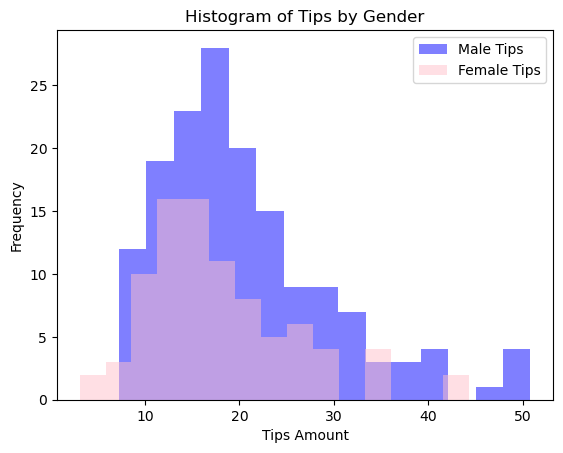

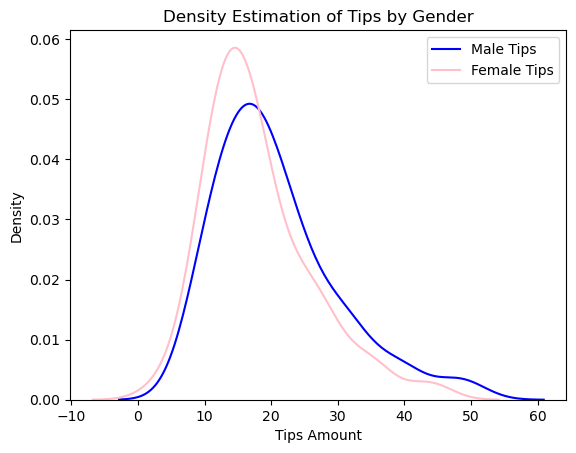

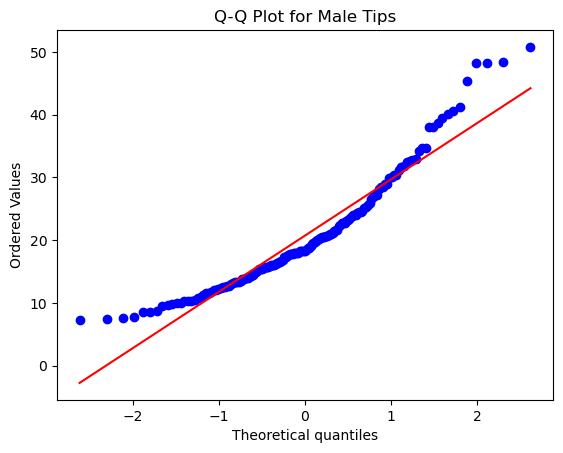

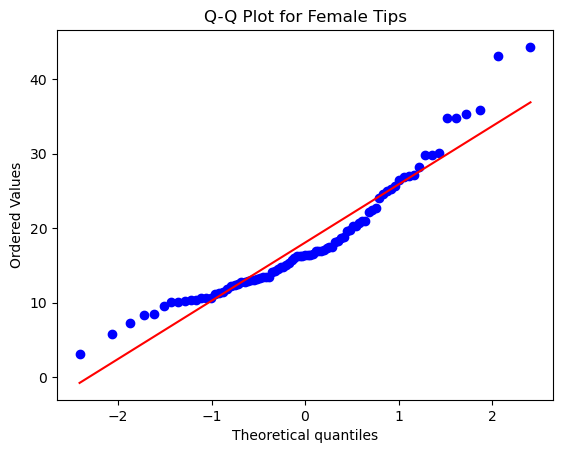

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

#Checking why Normality assumption was violated during the shapiro test...

# Histogram for male tips
plt.hist(male_tips, bins=15, alpha=0.5, label='Male Tips', color='blue')
plt.hist(female_tips, bins=15, alpha=0.5, label='Female Tips', color='pink')
plt.xlabel('Tips Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Tips by Gender')
plt.legend()
plt.show()

# Kernel density plot
sns.kdeplot(male_tips, label='Male Tips', color='blue')
sns.kdeplot(female_tips, label='Female Tips', color='pink')
plt.xlabel('Tips Amount')
plt.ylabel('Density')
plt.title('Density Estimation of Tips by Gender')
plt.legend()
plt.show()

# Q-Q plot for male tips
probplot(male_tips, plot=plt)
plt.title('Q-Q Plot for Male Tips')
plt.show()

# Q-Q plot for female tips
probplot(female_tips, plot=plt)
plt.title('Q-Q Plot for Female Tips')
plt.show()


In [ ]:
''' Side Notes:
Hypothesis Tests (e.g., t-test):
Normality assumption refers to: The distribution of the data itself.
Why it's important: Many tests derive their validity from this assumption.
Evaluation: Use plots (e.g., histograms) or tests (e.g., Shapiro-Wilk).

Linear Regression:
Normality assumption refers to: The distribution of residuals (errors) between observed and predicted values.
Why it's important: Ensures reliable hypothesis tests and confidence intervals for coefficients.
Evaluation: Use residual plots, Q-Q plots, or tests (e.g., Shapiro-Wilk on residuals).
In summary: Both contexts involve assessing normality, but they focus on different data—raw data vs. residuals.
'''

In [ ]:
'''
6 Alluring Arguments and Ugly Facts – Statistical Modelling and Hypothesis Testing
6.1 Hypothesis Testing
6.1.1 Tales and Tails: One- and Two-Tailed Tests
6.2 Normality Testing
6.2.1 Q-Q Plot
6.2.2 Shapiro-Wilk Test
6.2.3 D’Agostino K-squared Test
6.2.4 Kolmogorov-Smirnov Test
6.3 Chi-square Test
6.3.1 Goodness of Fit
6.3.2 Independence
6.4 Linear Correlation and Regression
6.4.1 Pearson Correlation
6.4.2 Linear Regression
6.4.3 Spearman Correlation
6.5 Hypothesis Testing with One Sample
6.5.1 One-Sample t-test for the Population Mean
6.5.2 One-Sample z-test for Proportions
6.5.3 Wilcoxon Signed Rank with One-Sample
6.6 Hypothesis Testing with Two Samples
6.6.1 Two-Sample t-test – Comparing Means, Same Variances
6.6.2 Levene's Test – Testing Homoscedasticity
6.6.3 Welch's t-test – Comparing Means, Different Variances
6.6.4 Mann-Whitney Test – Testing Non-normal Samples
6.6.5 Paired Sample t-test
6.6.6 Wilcoxon Matched Pairs
6.7 Analysis of Variance
6.7.1 One-factor or One-way ANOVA
6.7.2 Tukey's Range Test
6.7.3 Repeated Measures ANOVA
6.7.4 Kruskal-Wallis – Non-parametric One-way ANOVA
6.7.5 Two-factor or Two-way ANOVA
6.8 Tests as Linear Models
6.8.1 Pearson and Spearman Correlations
6.8.2 One-sample t- and Wilcoxon Signed Rank Tests
6.8.3 Two-Sample t- and Mann-Whitney Tests
6.8.4 Paired Sample t- and Wilcoxon Matched Pairs Tests
6.8.5 One-way ANOVA and Kruskal-Wallis Test
'''

In [ ]:
'''
References:

Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. 
    Cambridge University Press.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). 
    Bayesian Data Analysis (3rd ed.). CRC Press.

Rogel-Salazar, J. (2022). Statistics and Data Visualisation with Python.
'''